In [36]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('sales.csv',encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [38]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [39]:
df.fillna(method='ffill',inplace=True)
df.isnull().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
ADDRESSLINE1         0
ADDRESSLINE2        10
CITY                 0
STATE                0
POSTALCODE           0
COUNTRY              0
TERRITORY            1
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
dtype: int64

In [40]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [41]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [42]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])
df['day_of_week'] = df['ORDERDATE'].dt.dayofweek
df['month'] = df['ORDERDATE'].dt.month

In [43]:
x=df[['QUANTITYORDERED', 'PRICEEACH','SALES','day_of_week','month']]
x

,QUANTITYORDERED,PRICEEACH,SALES,day_of_week,month
0,30,95.70,2871.00,0,2
1,34,81.35,2765.90,2,5
2,41,94.74,3884.34,1,7
3,45,83.26,3746.70,0,8
4,49,100.00,5205.27,4,10
...,...,...,...,...,...
2818,20,100.00,2244.40,3,12
2819,29,100.00,3978.51,0,1
2820,43,100.00,5417.57,1,3
2821,34,62.24,2116.16,0,3


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.52289086,  0.5969775 , -0.37082523, -1.53722735, -1.39290889],
       [-0.11220131, -0.11445035, -0.42789707, -0.29485895, -0.57233673],
       [ 0.60650538,  0.54938372,  0.17944282, -0.91604315, -0.02528862],
       ...,
       [ 0.81185016,  0.81015797,  1.01202368, -0.91604315, -1.11938483],
       [-0.11220131, -1.06186404, -0.78072155, -1.53722735, -1.11938483],
       [ 1.2225397 , -0.89925195, -0.25763729,  0.94750944, -0.57233673]])

In [45]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [46]:
distortions = []
K_range = range(1, 11)  # You can adjust this range as needed
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    # distortions.append(sum(np.min(cdist(x_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / x_scaled.shape[0])
    distortions.append(kmeans.inertia_)

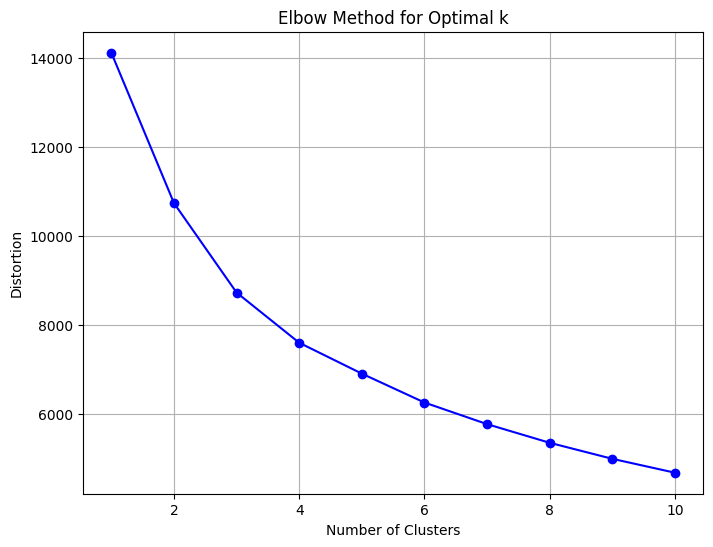

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

In [48]:
optimal_k = 3

# Perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(x_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# You can explore the cluster assignments and analyze the results
print(df[['QUANTITYORDERED', 'PRICEEACH','SALES','day_of_week', 'Cluster']])

      QUANTITYORDERED  PRICEEACH    SALES  day_of_week  Cluster
0                  30      95.70  2871.00            0        0
1                  34      81.35  2765.90            2        0
2                  41      94.74  3884.34            1        1
3                  45      83.26  3746.70            0        1
4                  49     100.00  5205.27            4        1
...               ...        ...      ...          ...      ...
2818               20     100.00  2244.40            3        0
2819               29     100.00  3978.51            0        0
2820               43     100.00  5417.57            1        1
2821               34      62.24  2116.16            0        2
2822               47      65.52  3079.44            4        2

[2823 rows x 5 columns]


In [49]:
df['Cluster'].value_counts()

0    1036
1     915
2     872
Name: Cluster, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


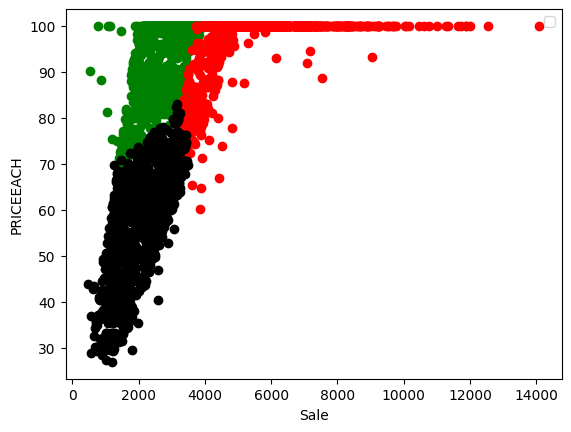

In [50]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
# df4=df[df.Cluster==3]
plt.scatter(df1.SALES,df1['PRICEEACH'],color='green')
plt.scatter(df2.SALES,df2['PRICEEACH'],color='red')
plt.scatter(df3.SALES,df3['PRICEEACH'],color='black')
# plt.scatter(df4.SALES,df4['PRICEEACH'],color='blue')
plt.legend()
plt.xlabel("Sale")
plt.ylabel('PRICEEACH')
plt.legend()

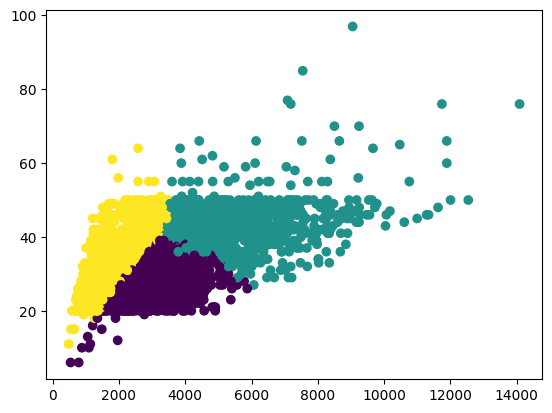

In [51]:
plt.scatter(x=df['SALES'],y=df['QUANTITYORDERED'],c=df['Cluster'])
plt.legend
# plt.xlim(0,100)
# plt.ylim(0,200)
plt.show()

In [52]:
for k in range(1,6):
    kmeans=KMeans(k)
    kmeans.fit(x_scaled)
    df[f'Kmeans{k}']=kmeans.labels_
    
df


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CONTACTFIRSTNAME,DEALSIZE,day_of_week,month,Cluster,Kmeans1,Kmeans2,Kmeans3,Kmeans4,Kmeans5
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,Kwai,Small,0,2,0,0,0,1,3,1
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Paul,Small,2,5,0,0,0,1,3,1
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Daniel,Medium,1,7,1,0,1,0,2,4
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Julie,Medium,0,8,1,0,1,0,2,4
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,Julie,Medium,4,10,1,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,Diego,Small,3,12,0,0,0,1,0,0
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Pirkko,Medium,0,1,0,0,1,1,3,1
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,Diego,Medium,1,3,1,0,1,0,2,1
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,Annette,Small,0,3,2,0,0,2,3,3


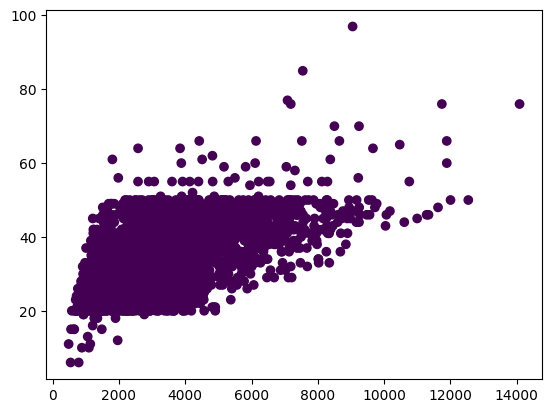

In [53]:
plt.scatter(x=df['SALES'],y=df['QUANTITYORDERED'],c=df['Kmeans1'])

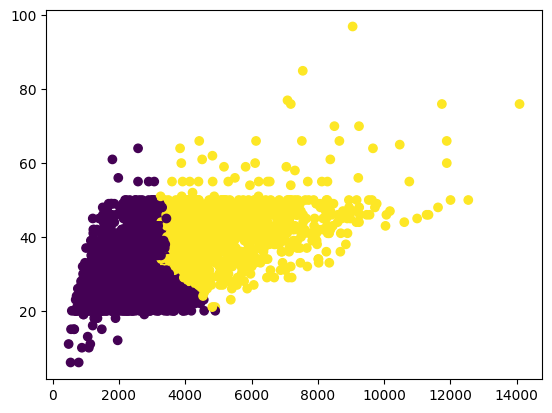

In [54]:
plt.scatter(x=df['SALES'],y=df['QUANTITYORDERED'],c=df['Kmeans2'])

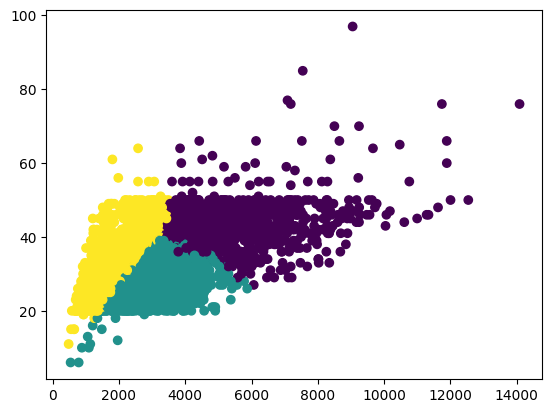

In [55]:
plt.scatter(x=df['SALES'],y=df['QUANTITYORDERED'],c=df['Kmeans3'])

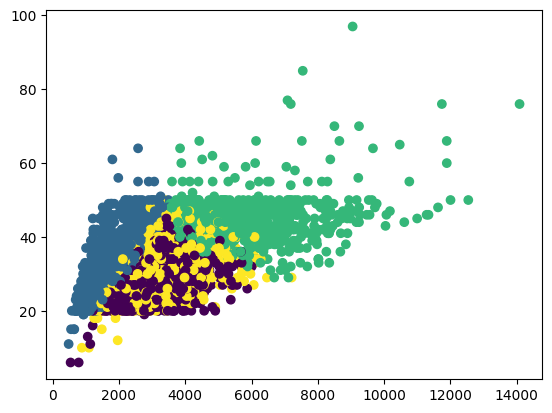

In [56]:
plt.scatter(x=df['SALES'],y=df['QUANTITYORDERED'],c=df['Kmeans4'])

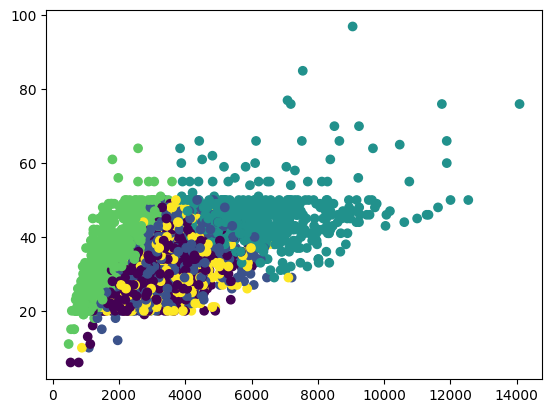

In [57]:
plt.scatter(x=df['SALES'],y=df['QUANTITYORDERED'],c=df['Kmeans5'])